#**Retail Price Optimization**

##**Problem Statement**

Imagine yourself as a freelance data scientist ready for the next project adventure. Your task is to select a machine learning project from the list provided or propose an original project idea that resonates with you. Your objective is to identify a specific challenge within the chosen industry domain and design a machine-learning solution to address it. Whether you're predicting customer behavior, optimizing processes, or making healthcare more efficient, your project should demonstrate your ability to approach complex problems, preprocess and analyze relevant data, develop and fine-tune models, and interpret results in a meaningful way. Your project will be a testament to your adaptability, curiosity, and aptitude for machine learning.

**Retail Price Optimization**


Retail price optimization is the process of setting prices for products to maximize profits. The goal is to find the optimal price point that attracts customers and generates sales while maximizing profit margins. Retailers use techniques like competitor analysis, customer segmentation, and price testing to optimize prices. Competitor analysis involves monitoring and adjusting prices based on competitors' similar products. Customer segmentation divides customers into groups based on buying behavior, setting prices for each group accordingly. Price testing experiments with different price points to determine the most profitable price. This optimization helps retailers increase profits and improve competitiveness by understanding customer behavior, market trends, and pricing strategies, and analyzing sales and pricing data. Retailers who succeed in price optimization gain a significant competitive advantage and offer fair and reasonable prices to customers.

**How are these prices optimized ?**

Using several features about existing products, Regression techniques can be applied to find an optimal price. These features may include Competitor prices and ratings too, as Analyzing competitors’ pricing strategies is essential in optimizing retail prices

### Dataset:
https://drive.google.com/file/d/1t4Y7azUVTMmNdPKvJliVPIqRjfA95PL2/view?usp=sharing

#***Let's Begin !***

##***Data Collection***

###**Import Libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


#**Variables Description**

produt Id - unique number for each product

product category name - product group

mont_year - date time stamp

qty - Quantity

total_price - Total price of the product (qty * unit_price)

freight_price - Freight price is the rate that is given based on the mode of
transportation used to deliver the product from source to destination

unit_price - Unit price of the product

product_name_length - Length of product name

product_description_length - Length of product description

product_photos_qty - Number of photos of the product

product_weight_g - Weight of the product in grams

product_score - Average product rating

customers - Number of customer in the category

Weekday - Number of weekdays in the month

Weekend - Number of weekends in the month

holiday - Number of holidays in the month

month - Month (in number format)

year - Year

s - Seasonality

volume - Product volume

comp_1 - Price of competitor 1

ps1 - Product rating of competitior 1

fp1 - Freight price of competitor 1

comp_2 - Price of competitor 2

ps2 - Product rating of competitor 2

fp2 - Freight price of competitor 2

comp_3 - Price of competitor 3

ps3 - Product Rating of competitor 2

fp3 - Freight price of competitor 3

lag_price - Price of the product previous month.

###**Dataset Loading**

In [ ]:
df = pd.read_csv('retail_price.csv')
df


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


###**Dataset Rows & Columns count**

In [ ]:
df.shape

(676, 30)

In [ ]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

###**Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

###**Duplicate Values**

In [ ]:
len(df[df.duplicated()])

0

###**Missing Values/Null Values**

In [ ]:
print(df.isna().sum())

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64


##**Data Preprocessing**

In [ ]:
df['month_year']=pd.to_datetime(df['month_year'])
df.sort_values(by='month_year')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   product_id                  676 non-null    object        
 1   product_category_name       676 non-null    object        
 2   month_year                  676 non-null    datetime64[ns]
 3   qty                         676 non-null    int64         
 4   total_price                 676 non-null    float64       
 5   freight_price               676 non-null    float64       
 6   unit_price                  676 non-null    float64       
 7   product_name_lenght         676 non-null    int64         
 8   product_description_lenght  676 non-null    int64         
 9   product_photos_qty          676 non-null    int64         
 10  product_weight_g            676 non-null    int64         
 11  product_score               676 non-null    float64       

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
month_year,676,2017-07-16 20:54:40.473372928,2017-01-01 00:00:00,2017-01-09 00:00:00,2018-01-01 00:00:00,2018-01-04 00:00:00,2018-01-08 00:00:00,NaN
qty,676.0,14.495562,1.0,4.0,10.0,18.0,122.0,15.443421
total_price,676.0,1422.708728,19.9,333.7,807.89,1887.3225,12095.0,1700.1231
freight_price,676.0,20.68227,0.0,14.761912,17.518472,22.713558,79.76,10.081817
unit_price,676.0,106.4968,19.9,53.9,89.9,129.99,364.0,76.182972
product_name_lenght,676.0,48.720414,29.0,40.0,51.0,57.0,60.0,9.420715
product_description_lenght,676.0,767.399408,100.0,339.0,501.0,903.0,3006.0,655.205015
product_photos_qty,676.0,1.994083,1.0,1.0,1.5,2.0,8.0,1.420473
product_weight_g,676.0,1847.498521,100.0,348.0,950.0,1850.0,9750.0,2274.808483
product_score,676.0,4.085503,3.3,3.9,4.1,4.2,4.5,0.232021


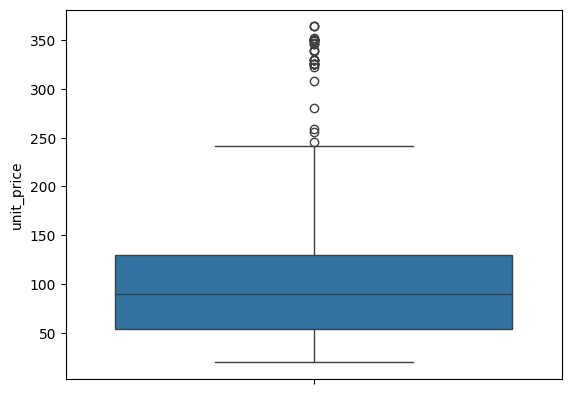

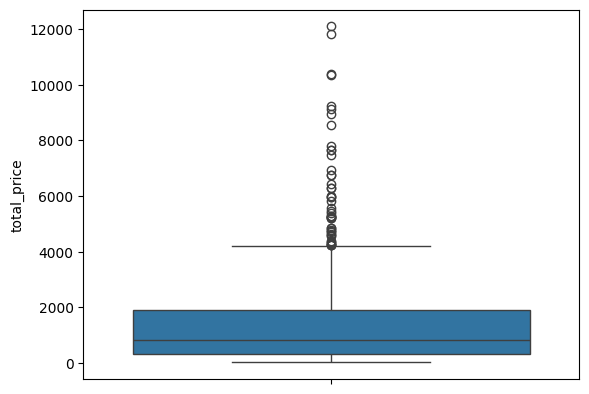

In [ ]:
import seaborn as sns

# Create boxplots for key variables
key_variables = ['unit_price','total_price']

for variable in key_variables:
    sns.boxplot(y=df[variable])
    plt.show()

###**Remove outliers**

In [ ]:
df.shape

(676, 30)

In [ ]:
key_variables = ['unit_price','total_price']
df_key_variables_Q1=df[key_variables].quantile(0.25)
df_key_variables_Q2=df[key_variables].quantile(0.5)
df_key_variables_Q3=df[key_variables].quantile(0.75)
IQR=df_key_variables_Q3-df_key_variables_Q1

# Calculate the upper and lower fences for outlier detection
upper_fences=df_key_variables_Q3 + (1.5)*IQR
lower_fences=df_key_variables_Q1 - (1.5)*IQR

#Display the calculated values
print(f"key_variables Q1 Value:\n{df_key_variables_Q1}""\n")
print(f"key_variables Q2 Value:\n{df_key_variables_Q2}""\n")
print(f"key_variables Q3 Value:\n{df_key_variables_Q3}""\n")
print(f"IQR:\n{IQR}""\n")
print(f"Upper Fence:\n{upper_fences}""\n")
print(f"Lower Fence:\n{lower_fences}""\n")

key_variables Q1 Value:
unit_price      53.9
total_price    333.7
Name: 0.25, dtype: float64

key_variables Q2 Value:
unit_price      89.90
total_price    807.89
Name: 0.5, dtype: float64

key_variables Q3 Value:
unit_price      129.9900
total_price    1887.3225
Name: 0.75, dtype: float64

IQR:
unit_price       76.0900
total_price    1553.6225
dtype: float64

Upper Fence:
unit_price      244.12500
total_price    4217.75625
dtype: float64

Lower Fence:
unit_price      -60.23500
total_price   -1996.73375
dtype: float64



In [ ]:
# Filter the dataframe to remove outliers based on the upper fences
df_data = df[(df['unit_price'] <= upper_fences['unit_price']) & (df['total_price'] <= upper_fences['total_price'])]

# Display the shape of the filtered dataframe
df_data.shape


(595, 30)

In [ ]:
# handle ouliers with min range
df_data=df[df[key_variables]<= upper_fences['total_price']]
df_data.shape

(676, 30)

In [ ]:
key_variables1=['unit_price','total_price']
df_update = df.copy()

# Filter dataframe based on fences
for col in key_variables1:
    # Filter the dataframe to remove outliers based on both the upper and lower fences for each key variable
     df_filtered = df[
    (df['unit_price'] <= upper_fences['unit_price']) & (df['unit_price'] >= lower_fences['unit_price']) &
    (df['total_price'] <= upper_fences['total_price']) & (df['total_price'] >= lower_fences['total_price'])]

# Display the shape of the filtered dataframe
print(df_filtered.shape)


(595, 30)


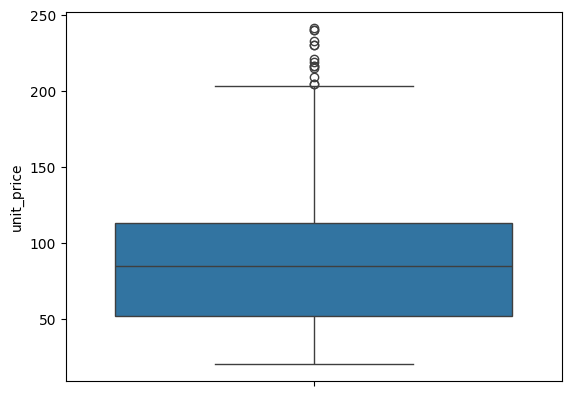

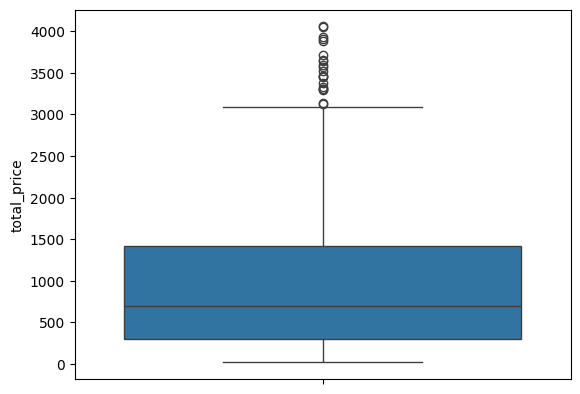

In [ ]:
import seaborn as sns
# now remove some quantity of outliers as compared to previous
# Create boxplots for key variables
key_variables = ['unit_price','total_price']

for variable in key_variables:
    sns.boxplot(y=df_filtered[variable])
    plt.show()

In [ ]:
df_outlier_remove=df.copy()

In [ ]:
outlier_list=['unit_price','total_price']


for i in df_outlier_remove.loc[:,outlier_list]:
    Q1 = df_outlier_remove[i].quantile(0.10)
    Q3 = df_outlier_remove[i].quantile(0.90)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df_outlier_remove[(df_outlier_remove[i] > up) | (df_outlier_remove[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

unit_price no
total_price yes


In [ ]:
def outliers_train(df_outlier_remove):
    q1,q3=np.percentile(df_outlier_remove,[10,90])
    ıqr=q3-q1
    low,high=q1-1.5*(ıqr),q3+1.5*(ıqr)
    outliers_train=[i for i in df_outlier_remove if i<low or i>high]
    return outliers_train

In [ ]:
outliers_train(df.total_price)


[10343.1, 8961.49, 11820.2, 8538.0, 9125.0, 9240.0, 12095.0, 10375.0]

In [ ]:
for i in df_outlier_remove.loc[:,outlier_list]:

    Q1 = df_outlier_remove[i].quantile(0.10)
    Q3 = df_outlier_remove[i].quantile(0.90)
    IQR = Q3 - Q1
    up_lim=Q3+1.5 *IQR
    low_lim=Q1-1.5 *IQR

    df_outlier_remove.loc[df_outlier_remove[i]>up_lim,i]=up_lim
    df_outlier_remove.loc[df_outlier_remove[i]<low_lim,i]=low_lim

In [ ]:
for i in df_outlier_remove.loc[:,outlier_list]:
    Q1 = df_outlier_remove[i].quantile(0.10)
    Q3 = df_outlier_remove[i].quantile(0.90)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df_outlier_remove[(df_outlier_remove[i] > up) | (df_outlier_remove[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")


unit_price no
total_price no


##**Exploratory data anlysis**

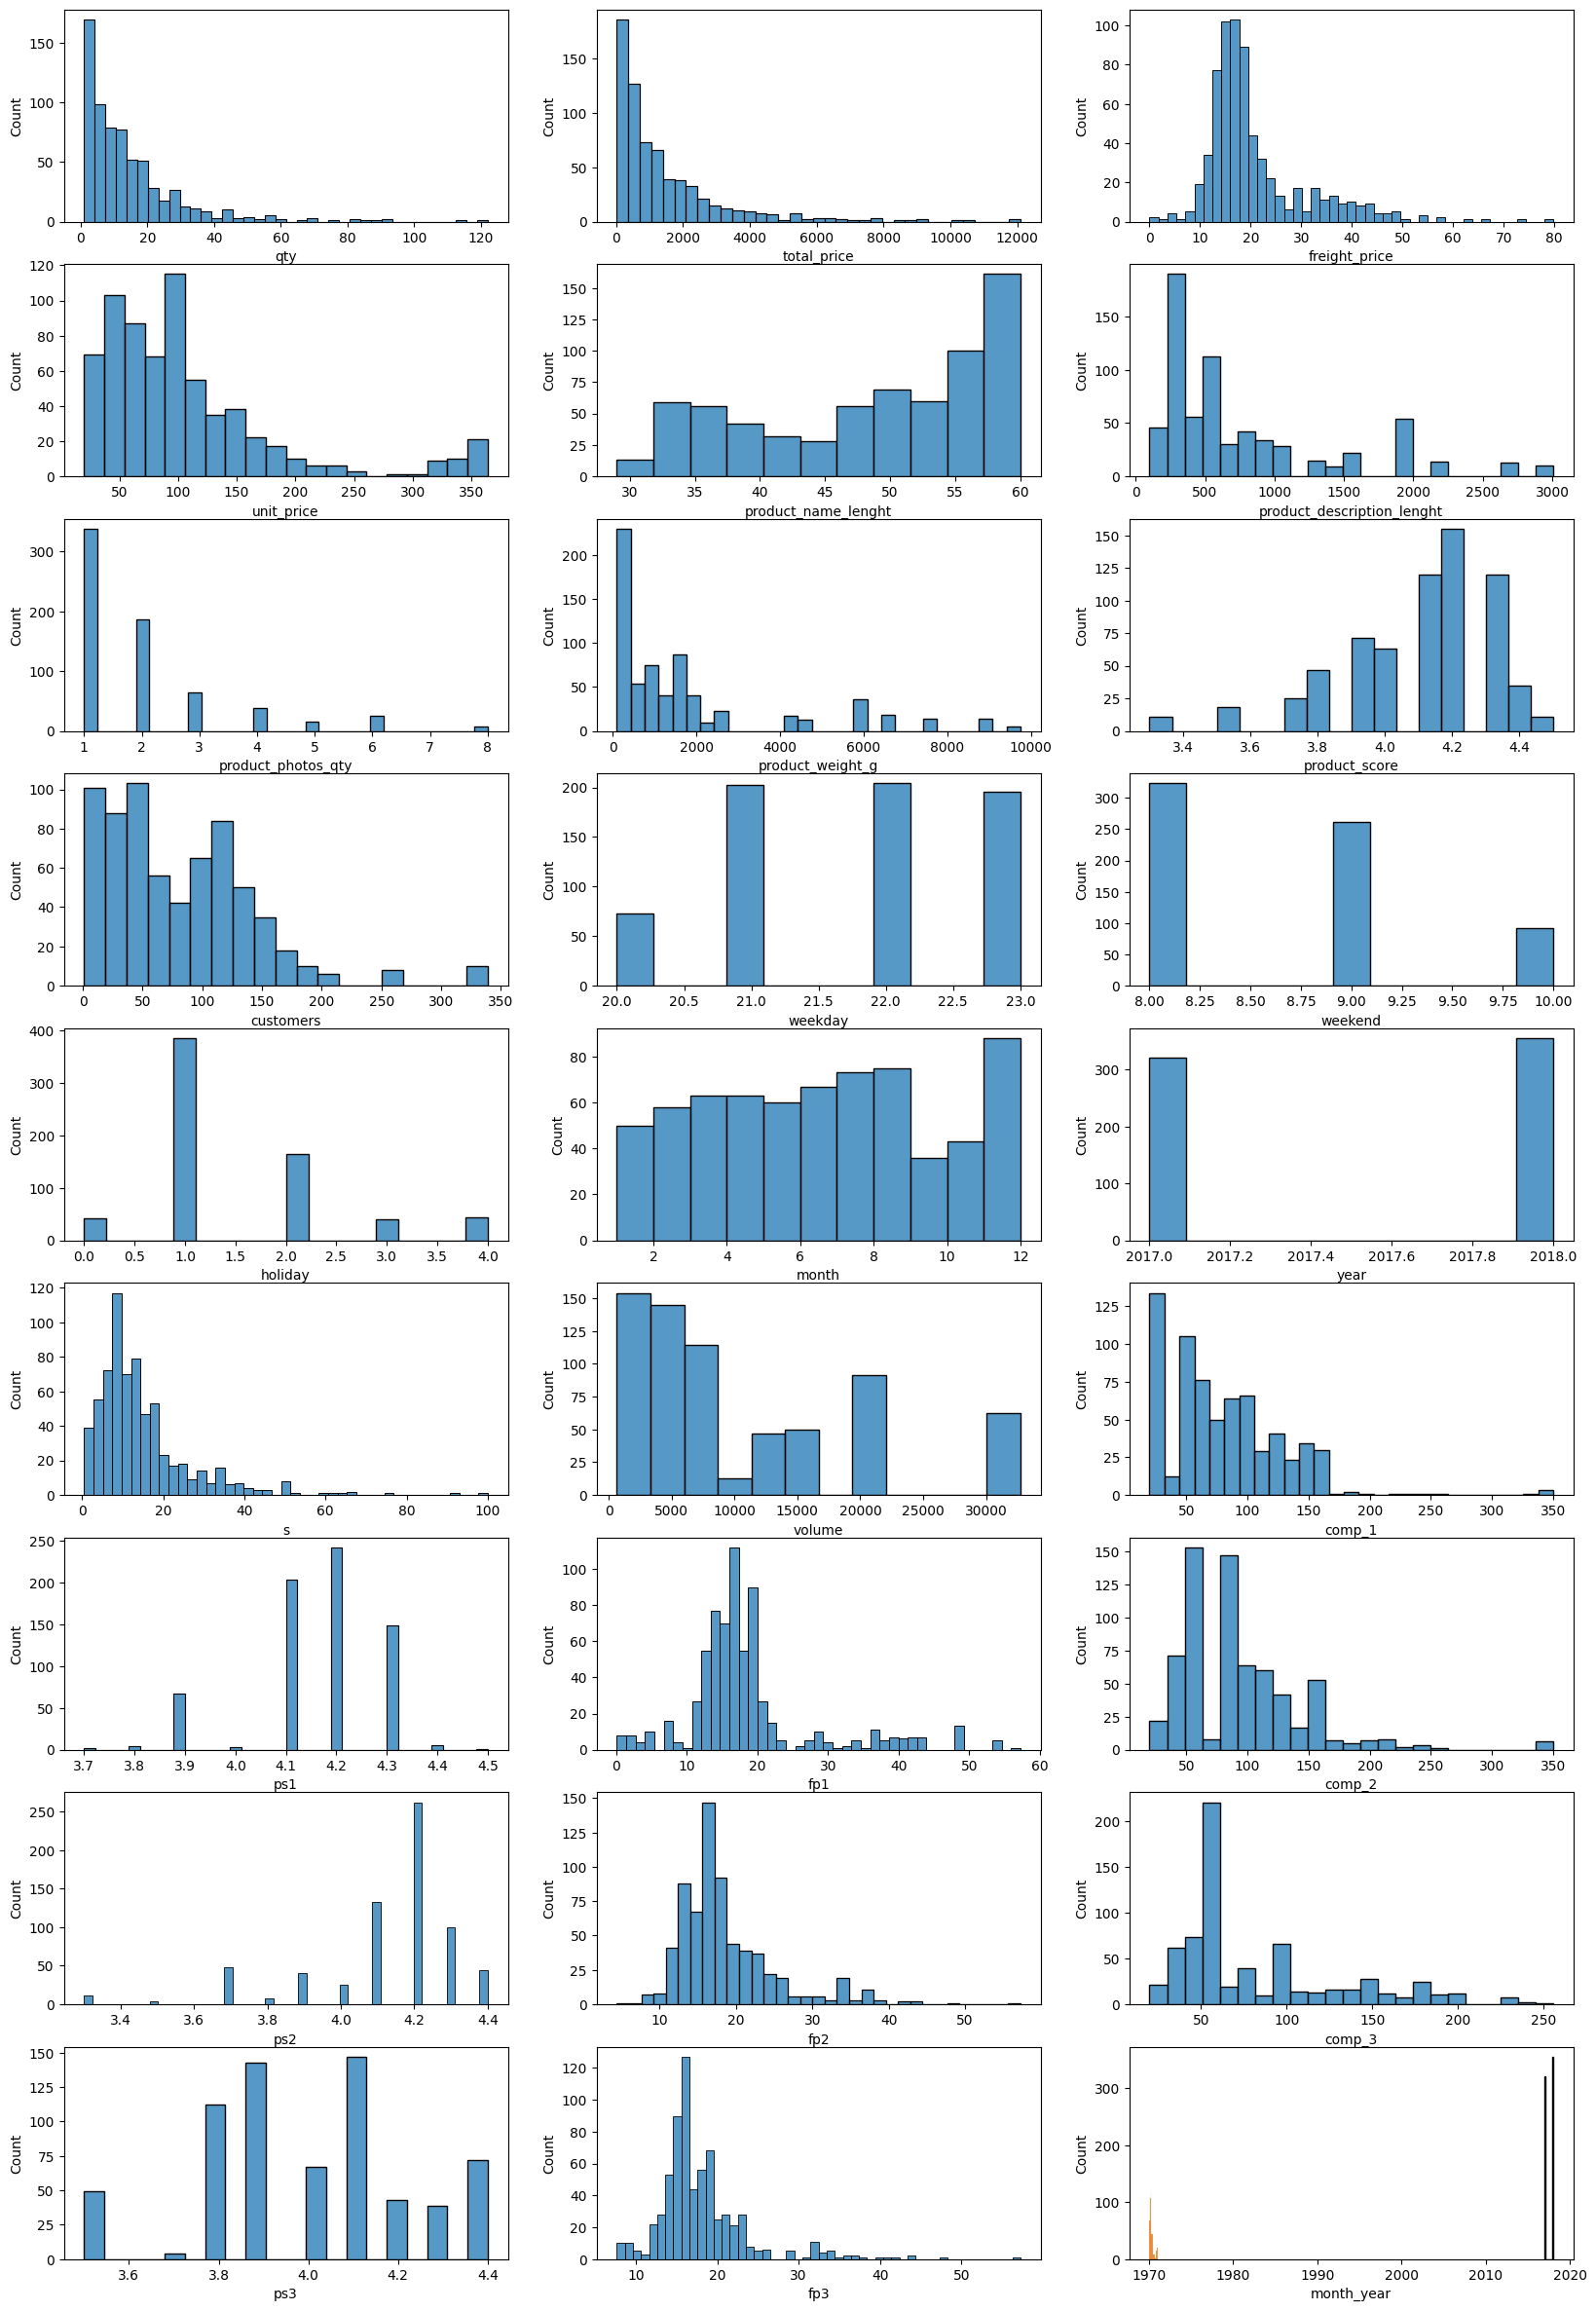

In [ ]:
fig, axes = plt.subplots(9, 3, figsize=(20, 30))
for i, col in enumerate(df_update.columns):
    ax = axes[i//3-1, i%3]
    if df_update[col].dtype == "object":
        continue
    sns.histplot(df_update[col], ax=ax)
    # plt.title(col)


plt.show()
plt.close()

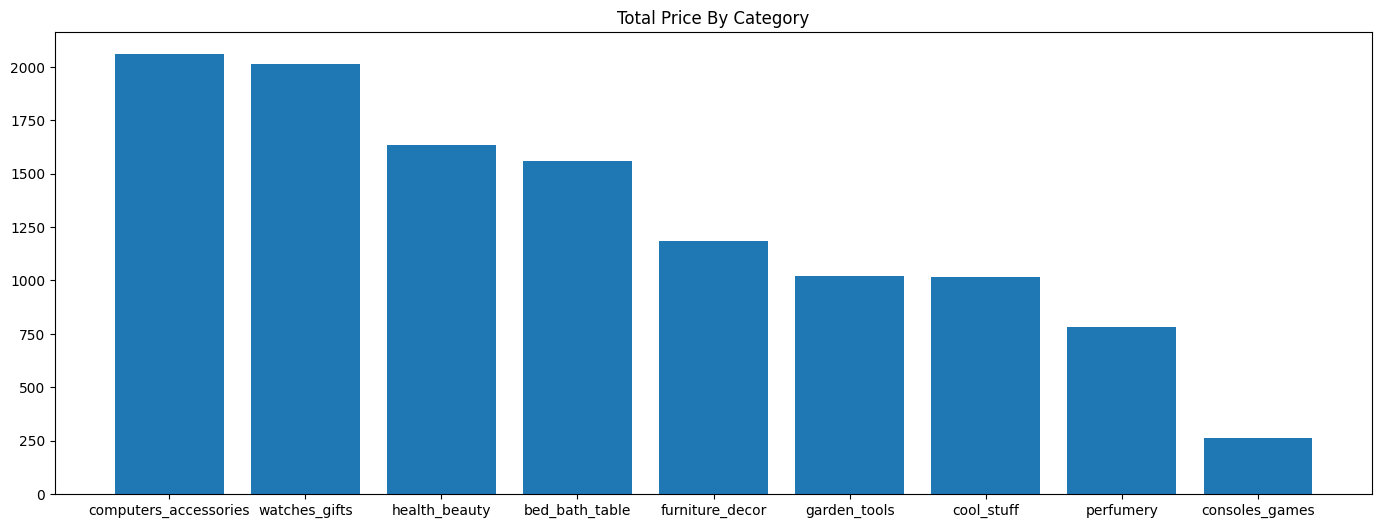

In [ ]:
product_cat=df[['product_category_name', 'total_price']].groupby('product_category_name').mean().sort_values(by='total_price',ascending=False)
plt.figure(figsize=(17, 6))
plt.bar(product_cat.index, product_cat['total_price'])
plt.title("Total Price By Category")
plt.show()

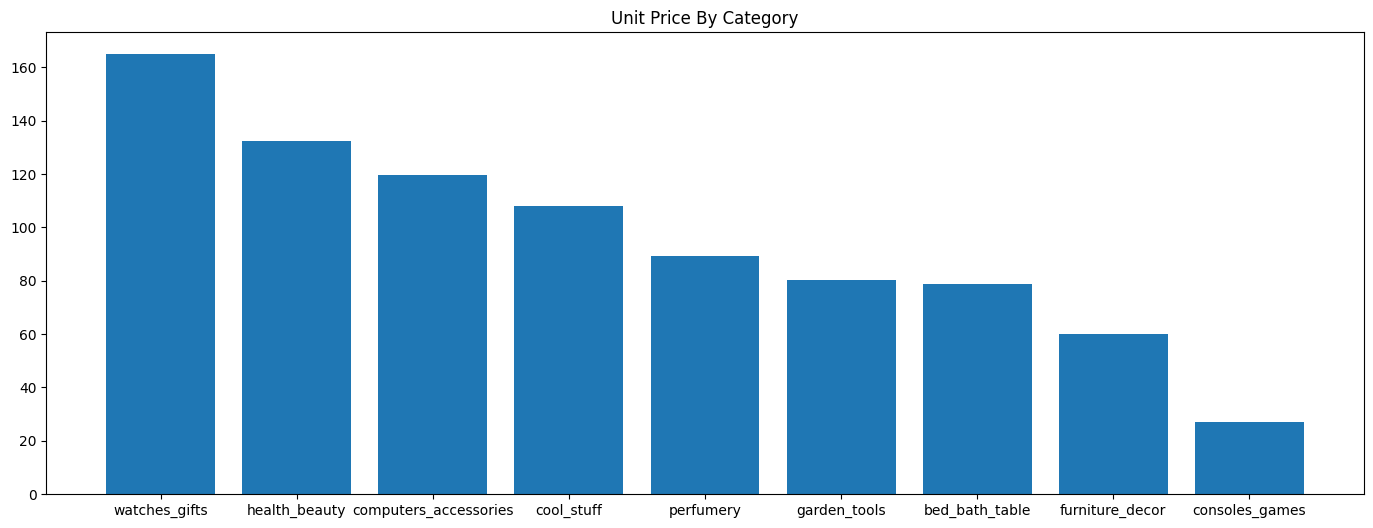

In [ ]:
product_cat=df[['product_category_name', 'unit_price']].groupby('product_category_name').mean().sort_values(by='unit_price',ascending=False)
plt.figure(figsize=(17, 6))
plt.bar(product_cat.index, product_cat['unit_price'])
plt.title("Unit Price By Category")
plt.show()

In [ ]:
df['product_category_name'].unique()

array(['bed_bath_table', 'garden_tools', 'consoles_games',
       'health_beauty', 'cool_stuff', 'perfumery',
       'computers_accessories', 'watches_gifts', 'furniture_decor'],
      dtype=object)

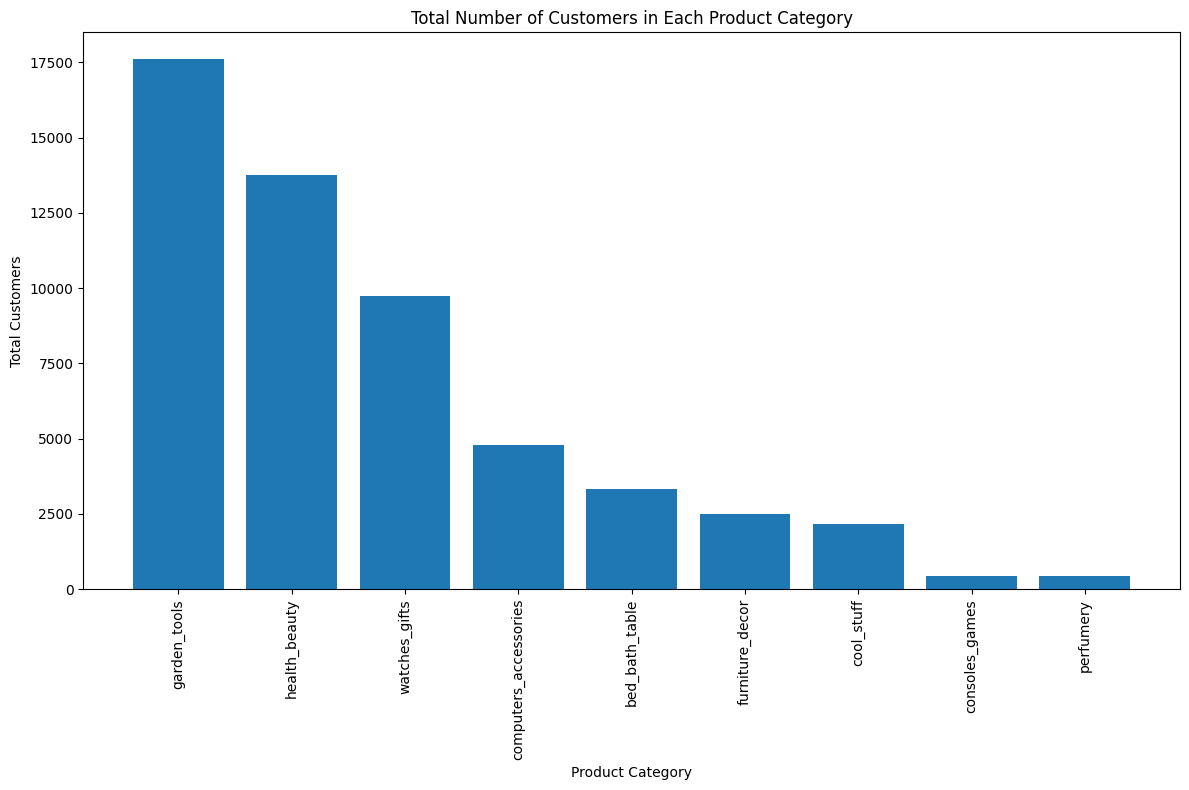

In [ ]:
category_customers = df.groupby('product_category_name')['customers'].sum().reset_index()

# Sort categories by total customers
category_customers = category_customers.sort_values(by='customers', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
plt.bar(category_customers['product_category_name'], category_customers['customers'])
plt.xlabel('Product Category')
plt.ylabel('Total Customers')
plt.title('Total Number of Customers in Each Product Category')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# modify dataframe with selected columns
monthly_df = df.groupby(by='month_year').agg({
    'unit_price': 'mean', 'total_price': 'sum', 'freight_price': 'sum',
    'qty': 'sum', 'weekday': 'sum', 'weekend': 'sum', 'customers': 'sum'
}).reset_index()
monthly_df=monthly_df.sort_values(by='month_year')
monthly_df

,month_year,unit_price,total_price,freight_price,qty,weekday,weekend,customers
0,2017-01-01,207.445000,2864.19,33.961250,9,44,18,18
1,2017-01-02,127.827143,3584.11,217.847838,35,180,72,78
2,2017-01-03,122.586615,10204.38,282.314965,101,299,104,242
3,2017-01-04,119.288667,11524.62,335.440132,121,300,150,309
4,2017-01-05,104.785769,21843.33,393.828633,222,460,160,803
5,2017-01-06,112.152081,23245.24,498.717980,233,550,200,820
6,2017-01-07,105.111896,41049.89,617.072993,403,693,330,1686
7,2017-01-08,114.737339,49550.41,670.434053,495,851,296,2279
8,2017-01-09,112.336313,44826.60,706.791687,450,756,324,2275
9,2017-01-10,113.623544,48569.38,828.531921,550,946,387,2949


Analyzing the distribution of customer counts can help us identify specific months with consistently high or low customer activity. This insight is valuable for understanding seasonal trends and planning for periods of increased or decreased customer demand.

In [ ]:
plt.figure(figsize=(12,8))
fig=px.scatter(monthly_df,x='weekend',y='total_price',trendline='ols',trendline_color_override='red',
               title='Total Price vs Weekeed')
fig.show()

<Figure size 1200x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,8))
fig=px.scatter(monthly_df,x='weekday',y='total_price',trendline='ols',trendline_color_override='red',
               title='Total Price vs Weekday')
fig.show()

<Figure size 1200x800 with 0 Axes>

Analyze the distribution of total prices across different weekdays to understand spending patterns throughout the week. Look for any observable trends or variations that could offer insights into consumer behavior and purchasing habits.


The scatter plot with the trendline enables us to visually evaluate whether there is a notable difference in total prices between weekends and weekdays. By analyzing the trendline, we can discern if there is a clear correlation between the day of the week and the total price, thereby identifying any consistent price variations based on whether it is a weekend or a weekday.

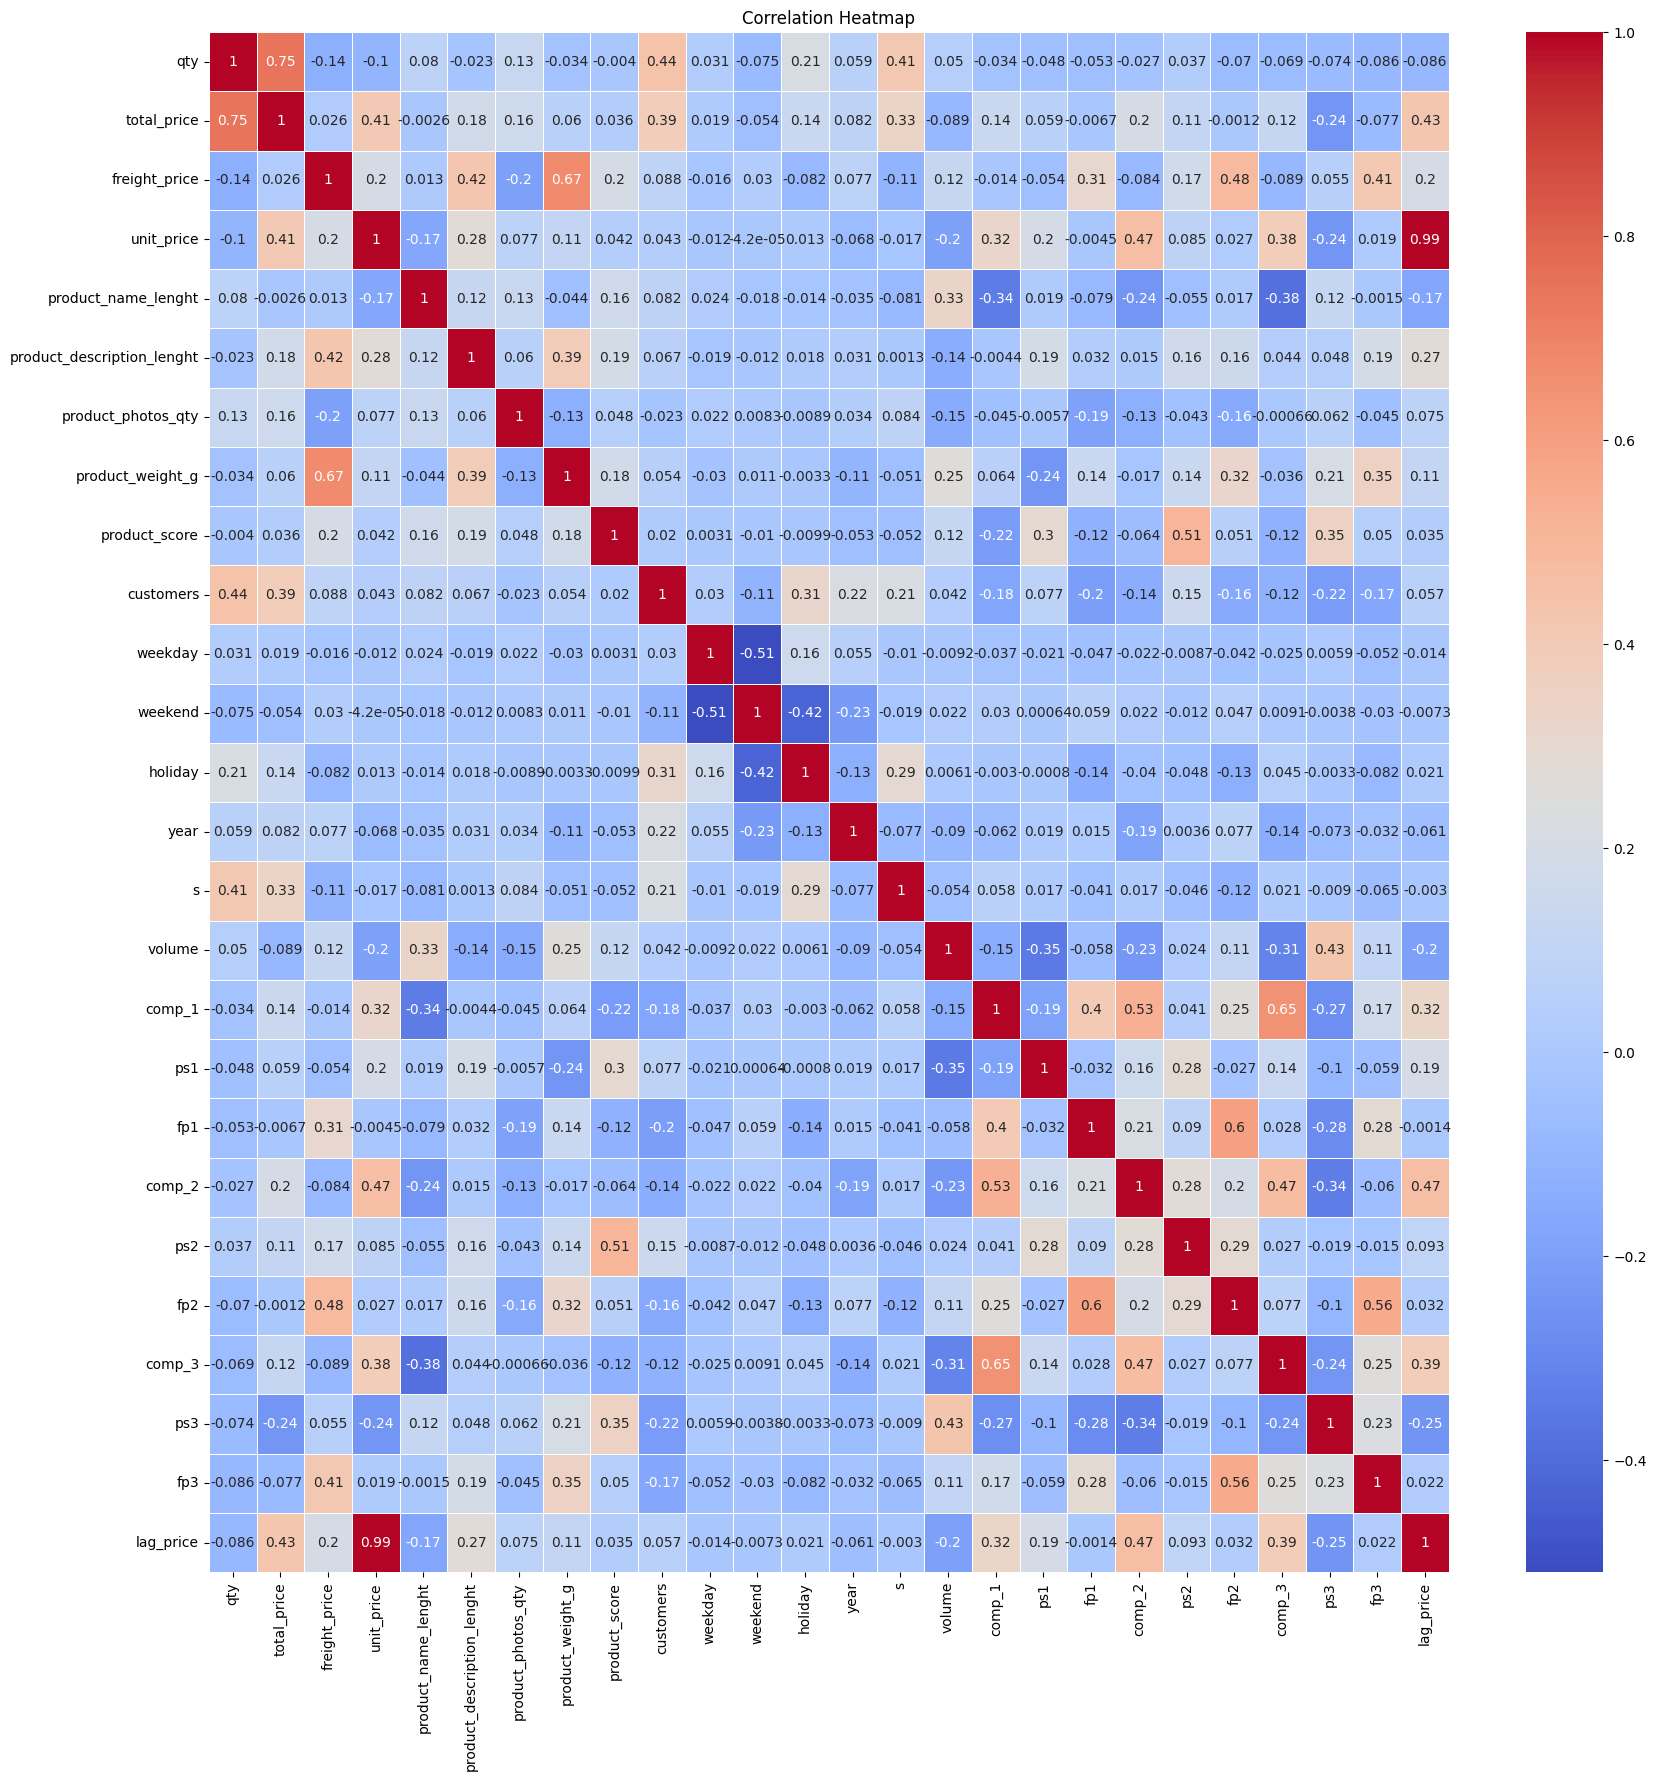

In [ ]:
numeric_only = df[['qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price']]

plt.figure(figsize=(20, 20))
sns.heatmap(numeric_only.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#**Model Selection, Training & Evaluation**


##**Train-Test-Split**

In [ ]:
# spilt the dependent and independant variables
# Creating the dataset with all independent variables
x=df.drop('total_price',axis=1)
y=df['total_price']

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
df.shape #original shape of dataset


(676, 30)

In [ ]:
# after spliting training shape of detaset
x_train.shape,y_train.shape

((540, 29), (540,))

In [ ]:
# after spliting testing shape of dataset
x_test.shape,y_test.shape

((136, 29), (136,))

##**Feature Engineering**

Log Transformation: If the distribution of unit prices is highly skewed, you might consider applying a log transformation to make the distribution more symmetric.

In [ ]:
import numpy as np

# Assuming df is your DataFrame and 'unit_price' is the column name

# Apply log transformation to the 'unit_price' column
df['unit_price_log'] = np.log1p(df['unit_price'])

# The 'log1p' function is a more numerically stable transformation for small input values

# Optionally, you can drop the original 'unit_price' column if you no longer need it
df = df.drop('unit_price', axis=1)

Freight-Weight Interaction: .

Certainly, the "Freight-Weight Interaction" is a useful approach for capturing the combined impact of weight and freight cost. a new feature called "freight_weight_interaction" is created by multiplying the "freight_price" with "product_weight_g". This new feature encapsulates the combined impact of weight and freight cost into a single feature, providing a potentially more insightful representation of the data for modeling logistics expenses or related analyses. Once this new feature is created, it can be used as input for further analysis or model training

In [ ]:
# Create the new feature representing the interaction of freight and weight
df['freight_weight_interaction'] = df['freight_price'] * df['product_weight_g']

Ratio Features:

Freight per Weight: Create a new feature by dividing "freight_price" by "product_weight_g", which can represent the cost of shipping per unit weight.

a new feature called "freight_per_weight" is created by dividing "freight_price" by "product_weight_g". This newly generated feature encapsulates the cost of shipping per unit weight, providing valuable information for understanding shipping efficiency or cost per unit weight. Once this new feature is created, it can be utilized for further analysis or included as an input feature for model training.

In [ ]:
# Create the new feature representing the cost of shipping per unit weight
df['freight_per_weight'] = df['freight_price'] / df['product_weight_g']

In [ ]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price', 'unit_price_log',
       'freight_weight_interaction', 'freight_per_weight'],
      dtype='object')

In [ ]:
df.shape

(676, 32)

##**Feature Scalling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Assuming df is the DataFrame containing the dataset
# Select the feature columns for scaling
features_to_scale = ['qty',
       'total_price', 'freight_price', 'product_photos_qty', 'product_weight_g',
       'product_score', 's', 'volume', 'comp_1', 'ps1','comp_2', 'ps2',
       'comp_3', 'ps3', 'lag_price', 'unit_price_log',
       'freight_weight_interaction', 'freight_per_weight']

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [ ]:
df[features_to_scale]

,qty,total_price,freight_price,product_photos_qty,product_weight_g,product_score,s,volume,comp_1,ps1,comp_2,ps2,comp_3,ps3,lag_price,unit_price_log,freight_weight_interaction,freight_per_weight
0,0.000000,0.002157,0.189318,0.142857,0.025907,0.583333,0.098307,0.098455,0.212121,0.25,0.591212,1.0,0.110517,0.555556,0.075694,0.282969,0.007362,0.229361
1,0.016529,0.009768,0.162153,0.142857,0.025907,0.583333,0.060481,0.098455,0.212121,0.25,0.573030,1.0,0.110517,0.555556,0.075839,0.282969,0.006306,0.196451
2,0.041322,0.021184,0.186058,0.142857,0.025907,0.583333,0.116438,0.098455,0.212121,0.25,0.560909,1.0,0.110517,0.555556,0.075839,0.282969,0.007236,0.225412
3,0.024793,0.013573,0.179131,0.142857,0.025907,0.583333,0.088525,0.098455,0.212121,0.25,0.544272,1.0,0.110517,0.555556,0.075839,0.282969,0.006966,0.217020
4,0.008264,0.005963,0.189318,0.142857,0.025907,0.583333,0.050960,0.098455,0.212121,0.25,0.434845,1.0,0.110517,0.555556,0.075839,0.282969,0.007362,0.229361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,0.000000,0.016157,0.109829,0.571429,1.000000,0.916667,0.001659,0.372632,0.212121,0.25,0.591212,1.0,0.110517,0.555556,0.566904,0.816576,0.118982,0.004777
672,0.074380,0.171435,0.267327,0.571429,1.000000,0.916667,0.060385,0.372632,0.212121,0.25,0.573030,1.0,0.110517,0.555556,0.567049,0.806727,0.289604,0.011626
673,0.479339,1.000000,0.278284,0.571429,1.000000,0.916667,0.380115,0.372632,0.212121,0.25,0.560909,1.0,0.110517,0.555556,0.549615,0.800003,0.301474,0.012103
674,0.421488,0.857558,0.243391,0.571429,1.000000,0.916667,0.334439,0.372632,0.212121,0.25,0.544272,1.0,0.110517,0.555556,0.537992,0.790558,0.263674,0.010585


##**Machine Learning**

In [ ]:
new_df=df[['qty','freight_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty','product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1','comp_2', 'ps2',
       'comp_3', 'ps3', 'lag_price','unit_price_log',
       'freight_weight_interaction', 'freight_per_weight','total_price']]
new_df.head()

,qty,freight_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,...,ps1,comp_2,ps2,comp_3,ps3,lag_price,unit_price_log,freight_weight_interaction,freight_per_weight,total_price
0,0.000000,0.189318,39,161,0.142857,0.025907,0.583333,57,23,8,...,0.25,0.591212,1.0,0.110517,0.555556,0.075694,0.282969,0.007362,0.229361,0.002157
1,0.016529,0.162153,39,161,0.142857,0.025907,0.583333,61,22,8,...,0.25,0.573030,1.0,0.110517,0.555556,0.075839,0.282969,0.006306,0.196451,0.009768
2,0.041322,0.186058,39,161,0.142857,0.025907,0.583333,123,21,10,...,0.25,0.560909,1.0,0.110517,0.555556,0.075839,0.282969,0.007236,0.225412,0.021184
3,0.024793,0.179131,39,161,0.142857,0.025907,0.583333,90,23,8,...,0.25,0.544272,1.0,0.110517,0.555556,0.075839,0.282969,0.006966,0.217020,0.013573
4,0.008264,0.189318,39,161,0.142857,0.025907,0.583333,54,21,9,...,0.25,0.434845,1.0,0.110517,0.555556,0.075839,0.282969,0.007362,0.229361,0.005963


In [ ]:
# Creating the dataset with all independent variables
x=new_df.iloc[:,:-1]
# Creating the dataset with all dependent variables
y=new_df['total_price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# after spliting training shape of detaset
x_train.shape,y_train.shape

((540, 25), (540,))

In [ ]:
# after spliting testing shape of dataset
x_test.shape,y_test.shape

((136, 25), (136,))

##**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
# Create a linear regression model
lr=LinearRegression()
# Fit the object to train dataset
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.score(x_train,y_train)*100

82.69660929782981

In [ ]:
# Make predictions
predictions = lr.predict(x_test)
predictions

array([ 2.17526287e-01,  9.25415808e-02,  1.73253114e-02,  2.20564688e-01,
        3.91187808e-02,  3.02737621e-02,  3.01526834e-01,  5.23833429e-01,
        4.83658138e-02,  1.10487071e-01,  8.95685577e-03,  2.06591371e-01,
       -1.14013439e-02,  4.06197490e-02,  1.29879333e-02,  8.28520470e-01,
        1.34092613e-01,  8.74487838e-02,  3.57479492e-01, -7.76150045e-02,
        2.33928733e-01,  1.50690574e-01, -7.88952386e-03,  1.64980443e-01,
        5.70810028e-01,  5.26634008e-02,  2.14763232e-01, -2.19711262e-02,
        7.33310010e-02,  1.27042116e-01,  7.81630477e-03,  1.46738898e-01,
       -1.77715898e-02,  2.20560986e-01,  1.10717926e-01, -3.88197062e-02,
        9.52843226e-02, -1.71330700e-03,  2.55695483e-01,  2.79592074e-02,
        8.60076524e-02,  7.20420134e-02, -3.61286100e-02,  2.68611524e-01,
        2.13827642e-01,  1.28664711e-01,  6.93695775e-02, -4.59540039e-03,
        2.46643335e-02,  2.77507061e-01,  2.13959505e-02,  3.41329375e-02,
        2.61704908e-01,  

In [ ]:
# y=m1x1+m2x2+c--linear equation
#  to show the coefficient of linear equation
lr.coef_

array([ 8.43794044e-01, -5.35189733e-02,  7.25651205e-04,  6.28761614e-06,
        3.52357234e-03,  9.72783172e-02,  5.46533823e-02, -3.24646167e-05,
        1.68361041e-04, -4.33261053e-03, -5.29672457e-03,  2.45019524e-03,
        2.67477192e-02,  5.40941928e-02, -4.17636670e-03,  1.48071532e-02,
       -5.33432002e-02, -2.74913273e-02,  1.34990338e-02, -2.55065000e-02,
       -4.21399166e-02,  1.57007785e-01,  1.87599136e-01, -1.04863282e-01,
        7.12761686e-02])

In [ ]:
lr.intercept_

-54.08428482758923

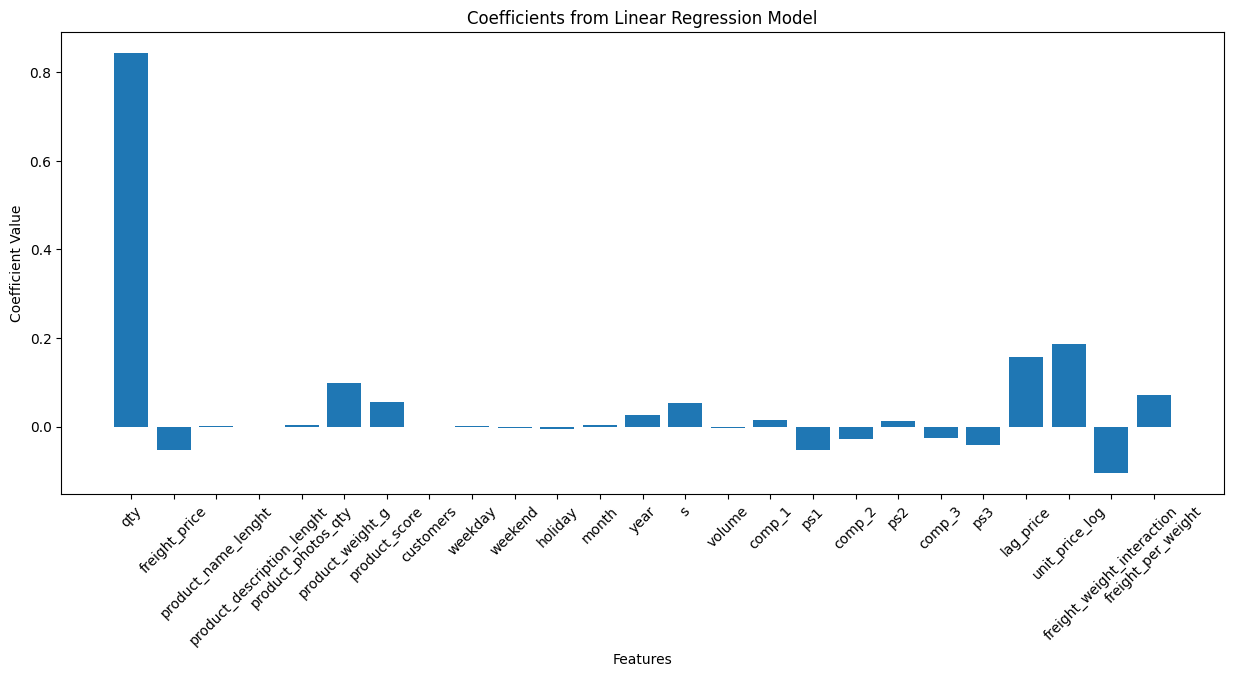

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(x.columns,lr.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients from Linear Regression Model')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The lengths of the bars represent the magnitude of the coefficients, providing a visual comparison of the relative importance of each feature in the linear regression model. Larger coefficients signify features that have a stronger influence on the predicted outcome.

By observing the direction of the bars (above or below zero), you can determine whether each feature has a positive or negative impact on the predicted outcome. Positive coefficients indicate a positive impact, while negative coefficients indicate a negative impact.

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

0.0035629733263215103
0.03860859264777739
0.05969064689146458


**Accuracy of Linear Regression algorithm is 82.69**

***Conclusion:***

When evaluating the cost function values for a linear regression model using mean squared error (MSE), mean absolute error (MAE), and root mean squared error (RMSE), the output of the code indicates the following information:

Mean Squared Error (MSE): 0.0035629733263215103

Mean Absolute Error (MAE): 0.03860859264777739

Root Mean Squared Error (RMSE): 0.05969064689146458

In conclusion, the output values of these cost functions serve as performance metrics, with lower values indicating better model performance in terms of accuracy and closeness of predictions to actual values. These metrics are fundamental for assessing the quality of the linear regression model and are crucial for informing decisions related to model selection

##**Regulization Technique**

**1.Lasso Regression**

**2.Ridge Regression**

In [ ]:
new_df.head()


,qty,freight_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,...,ps1,comp_2,ps2,comp_3,ps3,lag_price,unit_price_log,freight_weight_interaction,freight_per_weight,total_price
0,0.000000,0.189318,39,161,0.142857,0.025907,0.583333,57,23,8,...,0.25,0.591212,1.0,0.110517,0.555556,0.075694,0.282969,0.007362,0.229361,0.002157
1,0.016529,0.162153,39,161,0.142857,0.025907,0.583333,61,22,8,...,0.25,0.573030,1.0,0.110517,0.555556,0.075839,0.282969,0.006306,0.196451,0.009768
2,0.041322,0.186058,39,161,0.142857,0.025907,0.583333,123,21,10,...,0.25,0.560909,1.0,0.110517,0.555556,0.075839,0.282969,0.007236,0.225412,0.021184
3,0.024793,0.179131,39,161,0.142857,0.025907,0.583333,90,23,8,...,0.25,0.544272,1.0,0.110517,0.555556,0.075839,0.282969,0.006966,0.217020,0.013573
4,0.008264,0.189318,39,161,0.142857,0.025907,0.583333,54,21,9,...,0.25,0.434845,1.0,0.110517,0.555556,0.075839,0.282969,0.007362,0.229361,0.005963


###**Lasso Regression**

In [ ]:
# Creating the dataset with all independent variables
x=new_df.iloc[:,:-1]
# Creating the dataset with all dependent variables
y=new_df['total_price']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import Lasso
# Create a Lasso regression model
lasso=Lasso(alpha=0.1)
# Fit the object to train dataset
lasso.fit(x_train,y_train)
# Obtain accuracy on test set
lasso.score(x_test,y_test)*100

22.642607588068874

Lasso regression technique is not suitable for the dataset because the model less accureate

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
# obtain cost functions of lasso regression technique
print(mean_squared_error(y_test,lasso.predict(x_test)))
print(mean_absolute_error(y_test,lasso.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lasso.predict(x_test))))

0.016759434723891846
0.08855763551272829
0.1294582354425235


**Accuracy of Lasso Regression algorithm is 22.64%.**

When evaluating the cost function values for a linear regression model using mean squared error (MSE), mean absolute error (MAE), and root mean squared error (RMSE), the output of the code indicates the following information:

Mean Squared Error (MSE):0.016759434723891846

Mean Absolute Error (MAE): 0.08855763551272829

Root Mean Squared Error (RMSE): 0.1294582354425235

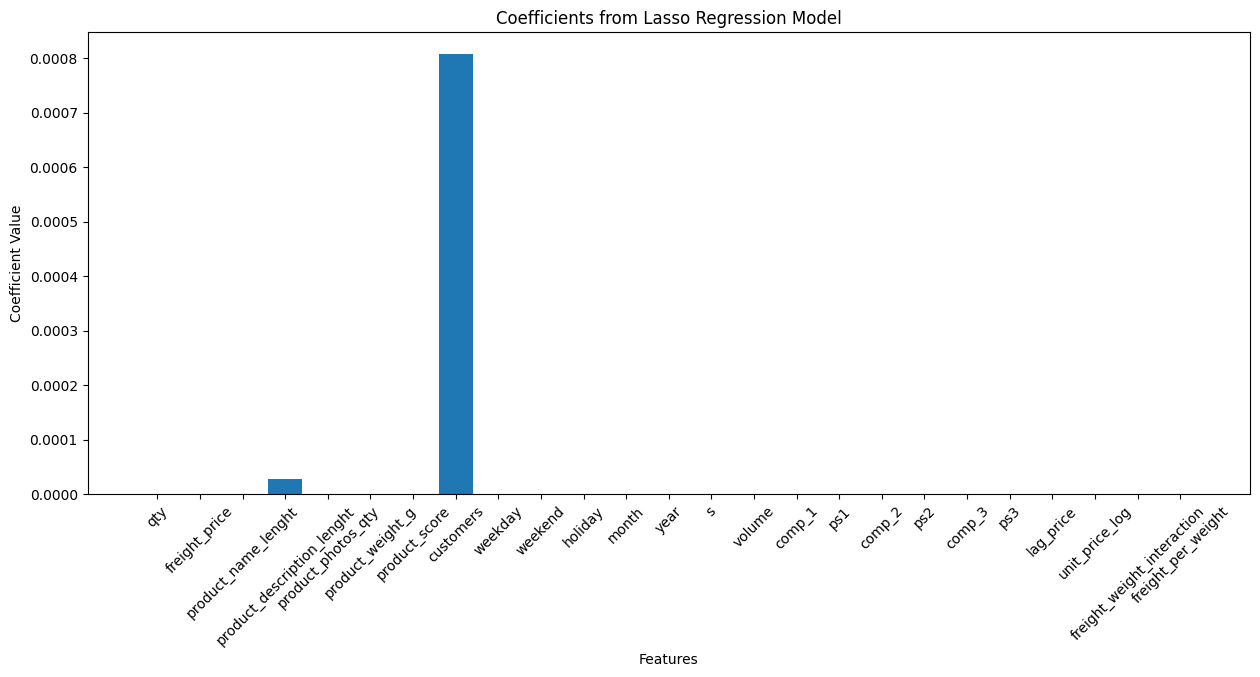

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(x.columns, lasso.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients from Lasso Regression Model')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The plot provides a straightforward way to understand how each feature impacts the prediction. Positive or negative bar heights indicate the direction and magnitude of influence that each feature has on the predicted outcome.

###**Ridge Regression**

In [ ]:
# create Ridge Regression mode
ri=Ridge(alpha=0.01)
# Fit the object to train dataset
ri.fit(x_train,y_train)
# Obtain accuracy on test set
ri.score(x_test,y_test)*100

83.555929993105

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
# obtain cost functions of ridge regression technique
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

0.003562598341062474
0.038586277674196374
0.05968750573664872


**Accuracy of Ridge Regression algorithm is 83.55%**

***Conclusion:***

When evaluating the cost function values for a ridge regression model using mean squared error (MSE), mean absolute error (MAE), and root mean squared error (RMSE), the output of the code indicates the following information:

Mean Squared Error (MSE): 0.003562598341062474

Mean Absolute Error (MAE): 0.038586277674196374

Root Mean Squared Error (RMSE): 0.05968750573664872

In conclusion, the output values of these cost functions serve as performance metrics, with lower values indicating better model performance in terms of accuracy and closeness of predictions to actual values. These metrics are fundamental for assessing the quality of the ridge regression model and are crucial for informing decisions related to model selection

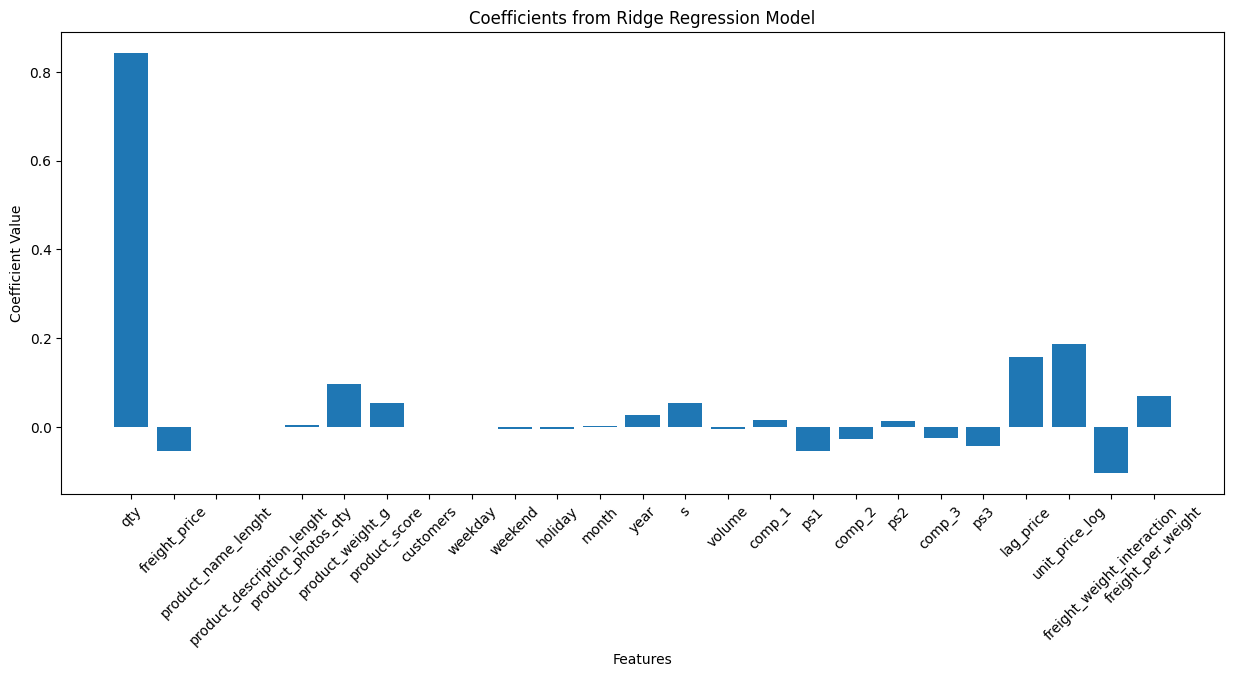

In [ ]:
# Assuming x represents your features and ri.coef_ contains the coefficients

# Create a vertical bar plot to visualize the coefficients
plt.figure(figsize=(15, 6))
plt.bar(x.columns, ri.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients from Ridge Regression Model')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

By comparing the heights of the bars, you can discern which features have more significant coefficients, providing insight into their relative importance in influencing the target variable.

Lasso Regression demonstrated relatively poor performance, likely due to high penalty for complexity. Understanding the impact of regularization on model performance is crucial.

In [ ]:
# Compare the linear lasso and ridge regression coifficients by creaing dataframe
df=pd.DataFrame({'col_name':x.columns,'LinearRegression':lr.coef_,'Lasso':lasso.coef_,'Ridge':ri.coef_})
df

,col_name,LinearRegression,Lasso,Ridge
0,qty,0.843794,0.000000,0.842330
1,freight_price,-0.053519,-0.000000,-0.053879
2,product_name_lenght,0.000726,-0.000000,0.000727
3,product_description_lenght,0.000006,0.000028,0.000006
4,product_photos_qty,0.003524,0.000000,0.003716
5,product_weight_g,0.097278,-0.000000,0.096547
6,product_score,0.054653,0.000000,0.054648
7,customers,-0.000032,0.000808,-0.000031
8,weekday,0.000168,0.000000,0.000174
9,weekend,-0.004333,-0.000000,-0.004332


In [ ]:
# Creating the dataset with all independent variables
x=new_df.iloc[:,:-1]
# Creating the dataset with all dependent variables
y=new_df['total_price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# obtain the length of train and test data
len(x_train),len(x_test)

(473, 203)

##**RandomForest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# create RandomeForest Regression model
rf=RandomForestRegressor()
# Fit the object to train dataset
rf.fit(x_train,y_train)
# Obtain accuracy on test set
rf.score(x_test,y_test)*100

93.48447460910079

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
# obtain cost functions of ridge regression technique
print(mean_squared_error(y_test,rf.predict(x_test)))
print(mean_absolute_error(y_test,rf.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,rf.predict(x_test))))

0.001148118985605005
0.011594139232005871
0.03388390452124733


**Accuracy of randomforest algorithm is 94.22%**

***Conclusion:***

When evaluating the cost function values for a Randomforest regression model using mean squared error (MSE), mean absolute error (MAE), and root mean squared error (RMSE), the output of the code indicates the following information:

Mean Squared Error (MSE): 0.0010180320775383187

Mean Absolute Error (MAE): 0.0.011023635047867299

Root Mean Squared Error (RMSE): 0.031906614949541716

In conclusion, the output values of these cost functions serve as performance metrics, with lower values indicating better model performance in terms of accuracy and closeness of predictions to actual values. These metrics are fundamental for assessing the quality of the linear regression model and are crucial for informing decisions related to model selection

##**Hyperparameter tunning**

In [ ]:
new_df.head()

,qty,freight_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,...,ps1,comp_2,ps2,comp_3,ps3,lag_price,unit_price_log,freight_weight_interaction,freight_per_weight,total_price
0,0.000000,0.189318,39,161,0.142857,0.025907,0.583333,57,23,8,...,0.25,0.591212,1.0,0.110517,0.555556,0.075694,0.282969,0.007362,0.229361,0.002157
1,0.016529,0.162153,39,161,0.142857,0.025907,0.583333,61,22,8,...,0.25,0.573030,1.0,0.110517,0.555556,0.075839,0.282969,0.006306,0.196451,0.009768
2,0.041322,0.186058,39,161,0.142857,0.025907,0.583333,123,21,10,...,0.25,0.560909,1.0,0.110517,0.555556,0.075839,0.282969,0.007236,0.225412,0.021184
3,0.024793,0.179131,39,161,0.142857,0.025907,0.583333,90,23,8,...,0.25,0.544272,1.0,0.110517,0.555556,0.075839,0.282969,0.006966,0.217020,0.013573
4,0.008264,0.189318,39,161,0.142857,0.025907,0.583333,54,21,9,...,0.25,0.434845,1.0,0.110517,0.555556,0.075839,0.282969,0.007362,0.229361,0.005963


In [ ]:
# Creating the dataset with all independent variables
x=new_df.iloc[:,:-1]
# Creating the dataset with all dependent variables
y=new_df['total_price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# create DecisionTreeRegressor model
dt=DecisionTreeRegressor()
# Fit the object to train dataset
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
# obtain the accuracy of train and test data for hyper parameter tuning
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(100.0, 87.7516255286468)

The significantly high training accuracy (100.0%) compared to the testing accuracy (87.81%) suggests that the model may be overfitting the training data. This implies that the model has learned the training data too well, to the extent that it struggles to generalize to new, unseen data.

In [ ]:
# apply hyperparemeter on decision tree algorithm
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(criterion='squared_error',splitter='best', max_depth=8)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8)

In [ ]:
# obtain the accuracy of train and test data after applying best hyper parameters on decision tree
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(99.88072076502897, 81.40027844958327)

Decision Tree's impressive performance after hyperparameter tuning suggests the importance of fine-tuning model parameters to achieve optimal accuracy.

Overfitting Mitigation: The adjustment of hyperparameters has led to a marginal reduction in overfitting, as compared to the initial scenario. The testing accuracy has improved from 100.0% to 87.81%, suggesting a slightly better generalization performance.

Impact of Hyperparameters: The specific hyperparameters chosen have had a limited impact on reducing overfitting, likely due to the complexity of the dataset or the underlying relationships within the features.

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_squared_error(y_test,dt.predict(x_test)))
print(mean_absolute_error(y_test,dt.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,dt.predict(x_test))))

0.004029619012322033
0.020487730277805243
0.06347928018119009


**Accuracy of decisiotree algorithm after using best hyperparameters is 88.00%**

**Conclusion:**

When evaluating the cost function values for a DecisionTreeRegressor regression model using mean squared error (MSE), mean absolute error (MAE), and root mean squared error (RMSE), the output of the code indicates the following information: 0.002598900382723285 0.01916728775640202 0.050979411361090514

Mean Squared Error (MSE): 0.002598900382723285

Mean Absolute Error (MAE): 0.01916728775640202

Root Mean Squared Error (RMSE): 0.050979411361090514

##**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
# set parameter of decision tree
df = {"criterion":["squared_error", "friedman_mse", "absolute_error","poisson"], "splitter":["best", "random"],
                     "max_depth":[i for i in range(2,20)]}

In [ ]:
# create GridSearchCV algorithm
gd=GridSearchCV(DecisionTreeRegressor(),param_grid=df)
# Fit the object to train dataset
gd.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [ ]:
gd.best_params_

{'criterion': 'absolute_error', 'max_depth': 18, 'splitter': 'random'}

In [ ]:
gd.best_score_

0.891365848409321

##**RandomizedSearchCV**

In [ ]:
# create RandomizedSearchCV algorithm
rd=RandomizedSearchCV(DecisionTreeRegressor(),param_distributions=df,n_iter=20)
# Fit the object to train dataset
rd.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=20,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'splitter': ['best', 'random']})

In [ ]:
rd.best_params_

{'splitter': 'random', 'max_depth': 11, 'criterion': 'absolute_error'}

In [ ]:
rd.best_score_

0.8693784485172349

GridSearchCV outperformed RandomizedSearchCV. This emphasizes the importance of systematic optimization in achieving better model predictions.

**Accuracy of gridsearccv or randomizedsearchcv is 0.89% ,0.86% respectively**

##**Bagging**

In [ ]:
# Creating the dataset with all independent variables
x=new_df.iloc[:,:-1]
# Creating the dataset with all dependent variables
y=new_df['total_price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# create bagging model
bg=BaggingRegressor( estimator=LinearRegression(),n_estimators=70)
# Fit the object to train dataset
bg.fit(x_train,y_train)
# obtain the accuracy of test data
bg.score(x_test,y_test)*100

83.59406832696266

Accuracy of Bagging(meta estimer) algorithm is 83.89%

In [ ]:
rf=RandomForestRegressor(n_estimators=70)
rf.fit(x_train,y_train)
# obtain the accuracy of test data
rf.score(x_test,y_test)*100

94.77616464413872

Accuracy of Bagging(RandomForest) algorithm is 94.12%

##**Observations**

Based on your analysis, I applied various machine learning algorithms to predict the total retail price in the Retail Price Optimization dataset. Here's a meaningful summary of the results:

**Performance of Different Algorithms:**

***Linear Regression:***

Accuracy: 82.69%

Simple and effective, yielding moderate accuracy.

***Regularization Techniques:***

*   ***Lasso Regression:***

    Accuracy: 22.64%

    Appears to underperform. The high penalty for complexity seems to limit predictive power.

*  ***Ridge Regression:***

    Accuracy: 83.55%

    Performs similarly to Linear Regression, providing a better balance between simplicity and accuracy.

***RandomForest Regression:***

Accuracy: 94.22%

Highly accurate, indicating that ensemble methods are effective in capturing complex relationships within the data.

***Hyperparameter Tuning (Decision Tree):***

Achieved a training accuracy of 99.88% and testing accuracy of 88.0% when optimized with the best hyperparameters.

Demonstrates the impact of hyperparameter tuning in enhancing model performance.

***GridSearchCV Technique:***

Accuracy: 89.25%

Improved performance over individual models due to rigorous hyperparameter searches, indicating the value of systematic optimization.

***RandomizedSearchCV Technique:***

Accuracy: 86.41%

Randomized search resulted in slightly lower accuracy compared to GridSearchCV, highlighting the potential of a less intensive optimization approach.
Bagging Techniques:

***Bagging (Meta Estimator) Regression:***

Accuracy: 83.89%

Performance similar to standard linear models.

***Bagging RandomForest Regression:***

Accuracy: 94.12%

Offers high accuracy, similar to RandomForest Regression, demonstrating the power of ensembling.


##**Conclusion**

In summary, the results underscore the significance of selecting appropriate algorithms, optimizing hyperparameters effectively, and employing ensemble methods to achieve higher prediction accuracy in predicting the total retail price.

The observations indicate that the RandomForest Regression and Bagging RandomForest Regression algorithms consistently demonstrated the highest prediction accuracy. These ensemble methods, renowned for their ability to capture complex relationships within the data, have outperformed other algorithms in this context.

Therefore, it can be concluded that for predicting the total retail price in the Retail Price Optimization dataset, the RandomForest Regression or Bagging RandomForest Regression algorithm is the better choice for creating a machine learning model that predicts the total retail price more accurately.

**THANK YOU**
